![Schematic overview](../figures/schematic.png){width=50%}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.axes import Axes

plt.rcParams['svg.fonttype'] = 'none'

In [126]:
red = "#D55E00"
blue = "#0072B2"
green = "#009E73"
grey = "#999999"

In [137]:
t = "Injections from the Plasma Sheet"
t1 = "EMIC wave\ngeneration in\ndusk-noon plume"
t2 = "100-300 keV\nelectron flux\nincrease"
t3 = "Chorus wave\ngeneration in\nmidnight-dawn\nplasma trough"

summary = "The net effect on $J(E)$ depends on the initial $J_{in}(E)$\nand on the steady-state attractor $J_{ul}(E) = f(D_{αα}, D_{EE})$"

f0title = "Moderate\ninjections"
f1title = "Strong\ninjections"

f0text = "Moderate initial gradient:\nelectron losses prevail"
f1text = "Steep initial gradient:\nchorus-driven electron\nacceleration prevails"

In [135]:
xlabel = "Energy"
ylabel = r"$\frac{J(E)}{J(E_0)}$"

def set_axis(ax: Axes, xlabel = xlabel, ylabel = ylabel):
    ax.set_xlabel(xlabel, fontsize="large")
    ax.set_ylabel(ylabel, rotation=0, fontsize="large")
    lims = (-0.05, 1.05)
    ax.set_xlim(*lims)
    ax.set_ylim(*lims)
    # remove the ticks
    ax.set_xticks([])
    ax.set_yticks([])
    # remove the frame
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [119]:
# Data for the left plot (Moderate injections)
E = np.linspace(0, 1, 1000)

def f(x, a = 0):
    return 1 - np.exp(a * x) * x

J_ul = f(E)
J_t0_left = f(E, -0.4)
J_t1_left = f(E, -0.2)
J_t0_right = f(E, 0.8)
J_t1_right = f(E, 0.3)

In [120]:
def pairlimits(
    pair, 
    xlim = None,
    ylim = None
):
    if xlim is not None:
        pair = filter(lambda x: x[0] >= xlim[0] and x[0] <= xlim[1], pair)
    if ylim is not None:
        pair = filter(lambda x: x[1] >= ylim[0] and x[1] <= ylim[1], pair)
    return pair
    

def limits(x,y,xlim=None,ylim=None):
    pair = pairlimits(zip(x,y), xlim, ylim)
    return list(zip(*pair))
    

In [133]:
def figtext(x, y, t, **kwargs):
    kwargs = {"ha": "center", "va": "center"} | kwargs
    plt.figtext(x, y, t, **kwargs)


def boxtext(x, y, t, **kwargs):
    bbox = dict(facecolor="none")
    figtext(x, y, t, bbox=bbox, **kwargs)


def arrowtext(ax: Axes, t, xy=(0.1, 0.1), **kwargs):
    ax.annotate(
        t,
        xy=xy,
        xytext=(0.1, -0.07),
        arrowprops=dict(facecolor="black"),
        xycoords="axes fraction",
        textcoords="axes fraction",
        va="center",
        ha="center",
        fontsize="large",
    )
    
def addtexts(ax):
    ax.text(1,0.3, "$t_0$")
    ax.text(1,0.2, "$t_1$")
    ax.text(1,0.1, "$J_{in}(E)$")
    ax.text(1,0, "$J_{ul}(E)$", color=grey)

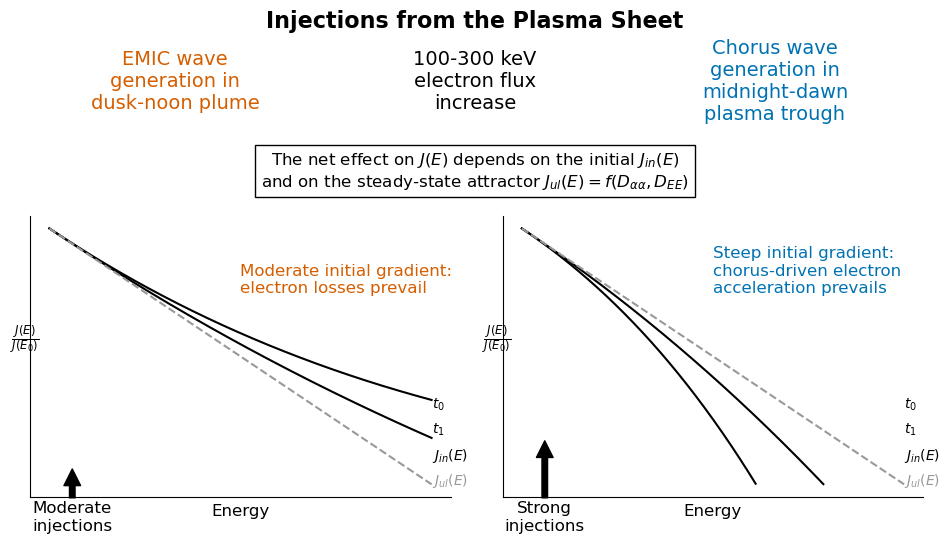

In [148]:
# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Left plot: Moderate injections
axes[0].plot(E, J_t0_left, label="J_in(E)", color="black")
axes[0].plot(E, J_t1_left, label="J_in(E)", color="black")
axes[0].plot(E, J_ul, label="J_ul(E)", color=grey, linestyle="--")

# Right plot: Strong injections
axes[1].plot(*limits(E, J_t0_right, ylim=(0,1)), label="J_in(E)", color="black")
axes[1].plot(*limits(E, J_t1_right, ylim=(0,1)), label="J_in(E)", color="black")
axes[1].plot(E, J_ul, label="J_ul(E)", color=grey, linestyle="--")

arrowtext(axes[0], f0title, xy=(0.1, 0.1))
axes[0].text(0.5, 0.75, f0text, fontsize="large", color=red)
addtexts(axes[0])

arrowtext(axes[1], f1title, xy = (0.1, 0.2))
axes[1].text(0.5, 0.75, f1text, fontsize="large", color=blue)
addtexts(axes[1])

# Adding the main annotation text
figtext(0.5, 0.9, t, fontsize=16, weight="bold")
figtext(0.25, 0.8, t1, color=red, fontsize=14)
figtext(0.5, 0.8, t2, fontsize=14)
figtext(0.75, 0.8, t3, color=blue, fontsize=14)

boxtext(0.5, 0.65, summary, fontsize=12)
# Show the plot
set_axis(axes[0])
set_axis(axes[1])
plt.tight_layout(rect=[0.1, 0, 0.9, 0.6])
plt.show()
fig.savefig("../figures/schematic.pdf")